Task 1: simulating from Gaussian Process model

In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

/home/agata/PycharmProjects/test1/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Observed data
x_obs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
y_obs = [0.328572824089476, 4.20607004111644, 1.35507551134795,
0.161608755204364, -5.42320349780782, -3.05851276224202, -0.0764172642034502,
-4.55218472276499, -0.902226297922731, -5.8609833528976, -1.05854090910473]

In [3]:
x_predict = np.linspace(-11,11,551,endpoint=True)
observed_idx = [26, 76, 126, 176, 226, 276, 326, 376, 426, 476, 526]

In [4]:
alpha = 3
rho = 5.5
sigma = 2

In [5]:
data = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_idx,
            y_obs = y_obs,
            alpha = 3,
            rho = 5.5,
            sigma = 2)

In [6]:
model = CmdStanModel(stan_file='gaussian_process.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
result = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 2 |▍         | 00:00 Status


chain 4 |▍         | 00:00 Status

chain 3 |▍         | 00:00 Status

chain 3 |▉         | 00:01 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |▉         | 00:02 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 4 |█▎        | 00:03 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 4 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 3 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 2 |█▊        | 00:07 Iterati


INFO:cmdstanpy:CmdStan done processing.


Plot few samples generated from model

In [8]:
y_predict = result.stan_variable('y_predict')

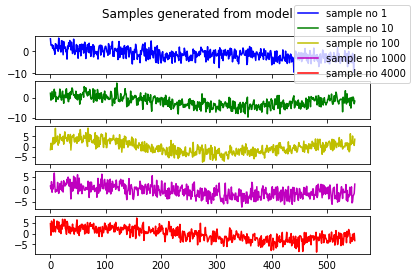

In [9]:
fig, axs = plt.subplots(5)
fig.suptitle('Samples generated from model')
axs[0].plot(y_predict[0], color = 'b')
axs[1].plot(y_predict[9], color = 'g')
axs[2].plot(y_predict[99], color = 'y')
axs[3].plot(y_predict[999], color = 'm')
axs[4].plot(y_predict[3999], color = 'r')
fig.legend(['sample no 1', 'sample no 10','sample no 100','sample no 1000','sample no 4000'], loc = 'upper right')

Plot mean value from model with its confidence interval (standar deviation, using errorbar function)

In [10]:
mean_values = []
std_values = []
for y in y_predict:
    mean_values.append(np.mean(y))
    std_values.append(np.std(y))

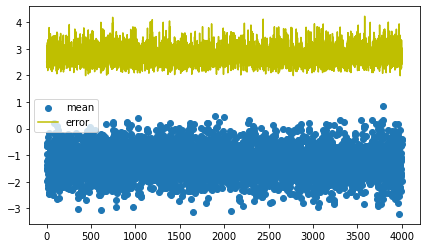

In [11]:
fig, axes = plt.subplots(1,1, figsize=(7, 4),sharex=True)

axes.scatter([*range(4000)],mean_values)
axes.errorbar([*range(4000)],std_values, color = 'y')

axes.legend(['mean','error'])
plt.show()

Task 2: optimize hyperparameters

In [12]:
model2 = CmdStanModel(stan_file='gaussian_process_optimize.stan')

INFO:cmdstanpy:compiling stan file /home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize.stan to exe file /home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize
INFO:cmdstanpy:compiled model executable: /home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize.hpp /home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize.stan
Warning in '/home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/agata/PycharmProjects/test1/lab6/gaussian_process_optimize.stan', line 14, column 31: cov_exp_quad
    is deprecated and will be removed in Stan 2.

In [21]:
data = dict(x_obs = x_obs,
            N_obs = len(y_obs),
            y_obs = y_obs)
            #alpha = 3,
            #rho = 5.5,
            #sigma = 2)

result2 = model2.optimize(data=data, seed=5838298)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
optimized_alpha = result2.stan_variable('alpha')
optimized_rho = result2.stan_variable('rho')
optimized_sigma = result2.stan_variable('sigma')
print('alpha',optimized_alpha)
print('rho',optimized_rho)
print('sigma',optimized_sigma)

alpha 3.1811
rho 1.13658
sigma 0.196539


In [32]:
data = dict(N_predict = len(x_predict),
            x_predict = x_predict,
            N_obs = len(y_obs),
            observed_idx = observed_idx,
            y_obs = y_obs,
            alpha = optimized_alpha,
            rho = optimized_rho,
            sigma = optimized_sigma)

In [33]:
result_model = model.sample(data=data, chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status
chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status


chain 4 |          | 00:00 Status
chain 1 |▍         | 00:00 Status

chain 3 |▍         | 00:00 Status


chain 4 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 2 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 3 |█▎        | 00:17 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▎        | 00:22 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 2 |█▎        | 00:23 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 3 |█▊        | 00:26 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█▊        | 00:30 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 2 |█▊        | 00:33 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 3 |██▎       | 00:35 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▎       | 00:38 Iteration:  300 / 2000 [ 15%]  (Warmup)
cha


INFO:cmdstanpy:CmdStan done processing.


In [34]:
y_predict_task2 = result_model.stan_variable('y_predict')

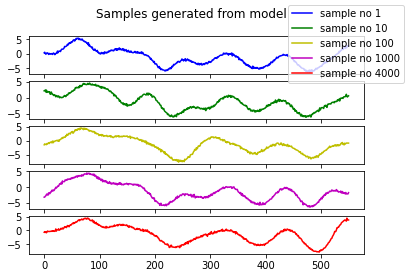

In [35]:
fig, axs = plt.subplots(5)
fig.suptitle('Samples generated from model')
axs[0].plot(y_predict_task2 [0], color = 'b')
axs[1].plot(y_predict_task2 [9], color = 'g')
axs[2].plot(y_predict_task2 [99], color = 'y')
axs[3].plot(y_predict_task2 [999], color = 'm')
axs[4].plot(y_predict_task2 [3999], color = 'r')
fig.legend(['sample no 1', 'sample no 10','sample no 100','sample no 1000','sample no 4000'], loc = 'upper right')

In [36]:
mean_values = []
std_values = []
for y in y_predict_task2:
    mean_values.append(np.mean(y))
    std_values.append(np.std(y))

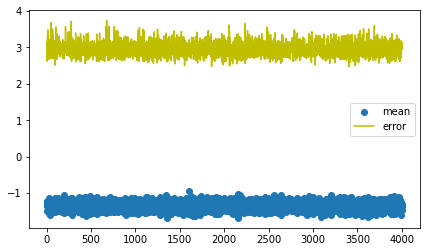

In [37]:
fig, axes = plt.subplots(1,1, figsize=(7, 4),sharex=True)

axes.scatter([*range(4000)],mean_values)
axes.errorbar([*range(4000)],std_values, color = 'y')

axes.legend(['mean','error'])
plt.show()